In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import cm

In [3]:
x1 = np.array([2,1])
S1 = 2
n1 = np.array([-1,0])
t1 = np.array([0,1])

In [4]:
x2 = np.array([1,2])
S2 = 2
n2 = np.array([0,-1])
t2 = np.array([1,0])

In [5]:
# New proposal. It seems np.arctan( (tt1 + S1 /2)  / d1 ) works at well, but the sign in d is important

def al(x0, y0) :
    xx = np.array([ x0, y0 ])
    d1 = np.dot((x1 - xx) , n1)
    tt1 = np.abs( np.dot((x1 - xx) , t1) )
    d2 = np.dot((x2 - xx) , n2)
    tt2 =np.abs( np.dot((x2 - xx) , t2))
    al1 = np.arctan2( tt1 + S1 /2  , d1 )   - np.arctan2( tt1 - S1 /2  , d1 ) 
    al2 = np.arctan2( tt2 + S2 /2  , d2 )   - np.arctan2( tt2 - S2 /2  , d2 ) 
    return (al1+al2) / np.pi

In [6]:
al(2,3)

0.35241638234956674

In [18]:
x_min = 0
x_max = 2.5
y_min = 0
y_max = 2.5

xr, yr = np.meshgrid(np.linspace(x_min,x_max, 100), np.linspace(y_min,y_max, 100))

v_al = np.vectorize( al )
y = v_al(xr,yr)

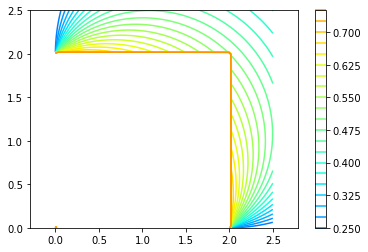

In [19]:
levels= np.linspace( 0.25, 0.75, 21)
plt.contour(xr, yr , y , levels , extent=[x_min,x_max,y_min,y_max], cmap=cm.jet, vmin=0, vmax=1, origin='lower')
plt.axis('equal')
plt.colorbar()

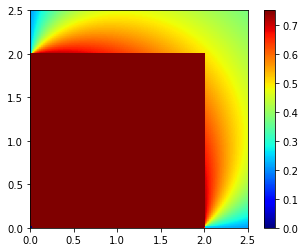

In [21]:
plt.imshow(y,extent=[x_min,x_max,y_min,y_max], aspect = 'equal', cmap=cm.jet, vmin=0, vmax=0.75, origin='lower')
#plt.imshow(y, cmap=cm.jet, origin='lower')
#plt.colorbar(boundaries=np.linspace(0,1,5))
plt.colorbar()

In [10]:
def al_tan(x0, y0) :
    xx = np.array([ x0, y0 ])
    d1 = np.abs(np.dot((x1 - xx) , n1))
    tt1 = np.abs( np.dot((x1 - xx) , t1) )
    d2 = np.abs(np.dot((x2 - xx) , n2))
    tt2 =np.abs( np.dot((x2 - xx) , t2))
    al1 = np.arctan(( tt1 + S1 /2  )/ d1 )   - np.arctan(( tt1 - S1 /2  )/ d1 ) 
    al2 = np.arctan(( tt2 + S2 /2  )/ d2 )   - np.arctan(( tt2 - S2 /2  )/ d2 ) 
    return (al1 + al2 ) / np.pi

In [11]:
v_altan = np.vectorize( al_tan )
y = v_altan(xr,yr)

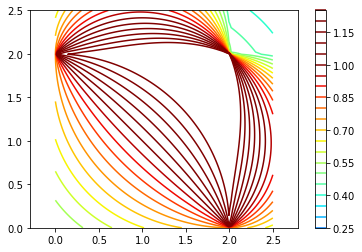

In [12]:
levels= np.linspace( 0.25, 1.25, 21)
plt.contour(xr, yr , y , levels , extent=[x_min,x_max,y_min,y_max], cmap=cm.jet, vmin=0, vmax=1, origin='lower')
plt.axis('equal')
plt.colorbar()

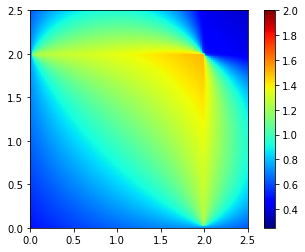

In [15]:
plt.imshow(y,extent=[x_min,x_max,y_min,y_max], aspect = 'equal', cmap=cm.jet, vmin=0.25, vmax=2, origin='lower')
#plt.imshow(y, cmap=cm.jet, origin='lower')
#plt.colorbar(boundaries=np.linspace(0,1,5))
plt.colorbar()

In [29]:
al(2.001,0.5)

0.7041197758427505

In [30]:
al_tan(2.001,0.5)

1.294182573191461